In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import classification_report


In [2]:
Fraud=pd.read_csv("Fraud_check.csv")
Fraud

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

In [3]:
Fraud["Undergrad"].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [4]:
Fraud["Marital.Status"].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [5]:
Fraud["Urban"].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [6]:
Fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [7]:
Fraud.iloc[:, 0] =LabelEncoder().fit_transform(Fraud['Undergrad'])
Fraud.iloc[:,0] 

C:\Users\pirfa\AppData\Local\Temp\ipykernel_25096\2165782260.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Fraud.iloc[:, 0] =LabelEncoder().fit_transform(Fraud['Undergrad'])


0      0
1      1
2      0
3      1
4      0
      ..
595    1
596    1
597    0
598    1
599    0
Name: Undergrad, Length: 600, dtype: int32

In [8]:
Fraud.iloc[:, 1] =LabelEncoder().fit_transform(Fraud['Marital.Status'])
Fraud.iloc[:,1] 

C:\Users\pirfa\AppData\Local\Temp\ipykernel_25096\1494285234.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Fraud.iloc[:, 1] =LabelEncoder().fit_transform(Fraud['Marital.Status'])


0      2
1      0
2      1
3      2
4      1
      ..
595    0
596    0
597    0
598    1
599    0
Name: Marital.Status, Length: 600, dtype: int32

In [9]:
Fraud.iloc[:, 5] =LabelEncoder().fit_transform(Fraud['Urban'])
Fraud.iloc[:,5] 

C:\Users\pirfa\AppData\Local\Temp\ipykernel_25096\777465848.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Fraud.iloc[:, 5] =LabelEncoder().fit_transform(Fraud['Urban'])


0      1
1      1
2      1
3      1
4      0
      ..
595    1
596    1
597    1
598    0
599    0
Name: Urban, Length: 600, dtype: int32

In [10]:
Fraud

Undergrad  Marital.Status  Taxable.Income  City.Population  \
0            0               2           68833            50047   
1            1               0           33700           134075   
2            0               1           36925           160205   
3            1               2           50190           193264   
4            0               1           81002            27533   
..         ...             ...             ...              ...   
595          1               0           76340            39492   
596          1               0           69967            55369   
597          0               0           47334           154058   
598          1               1           98592           180083   
599          0               0           96519           158137   

     Work.Experience  Urban  
0                 10      1  
1                 18      1  
2                 30      1  
3                 15      1  
4                 28      0  
..               ...    ...  
595                7      1  
596                2      1  
597                0      1  
598               17      0  
599               16      0  

[600 rows x 6 columns]

In [11]:
X=Fraud.iloc[:,0:5]
Y=LabelEncoder().fit_transform(Fraud['Urban'])

In [12]:
Fraud['Urban'].value_counts()

1    302
0    298
Name: Urban, dtype: int64

In [13]:
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [14]:
# Building the decision tree classifier using entropy criteria
model = DecisionTreeClassifier(criterion='entropy')
#clmn impurity / disorder can be known with using entropy

In [15]:
# Fit the model to the training data
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

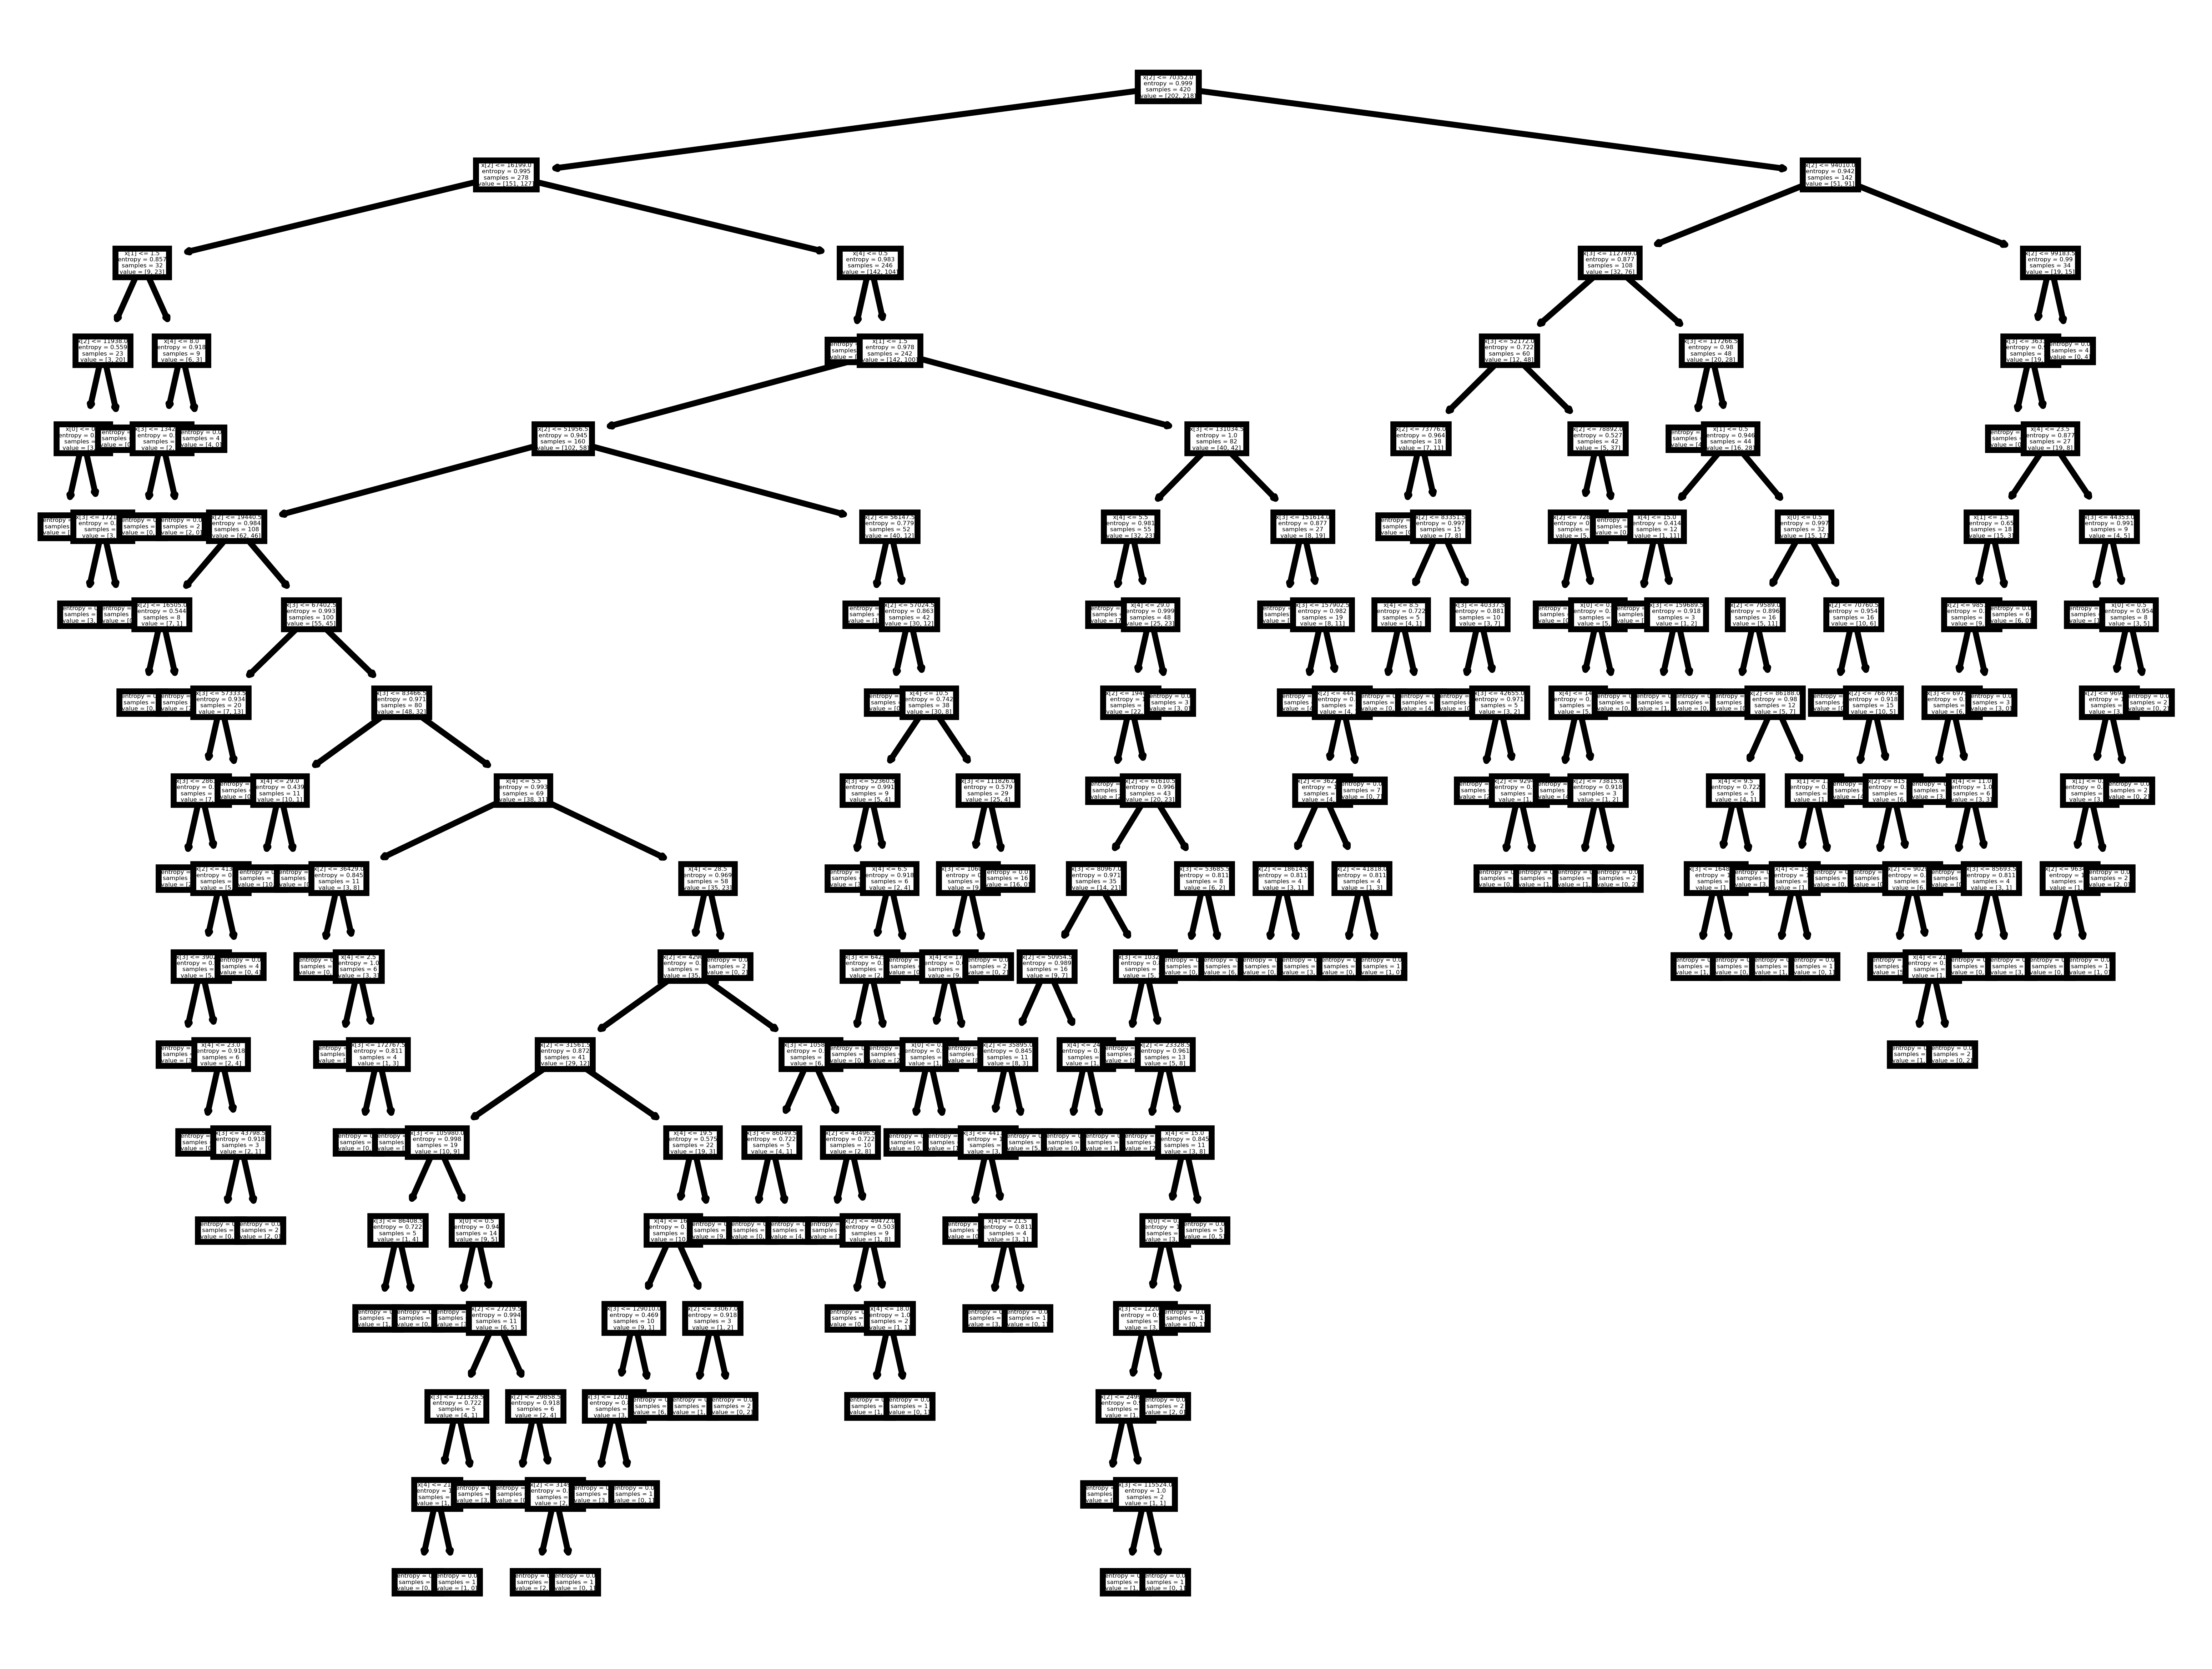

In [16]:
#PLot the decision tree
plt.figure(dpi=1200)
tree.plot_tree(model);

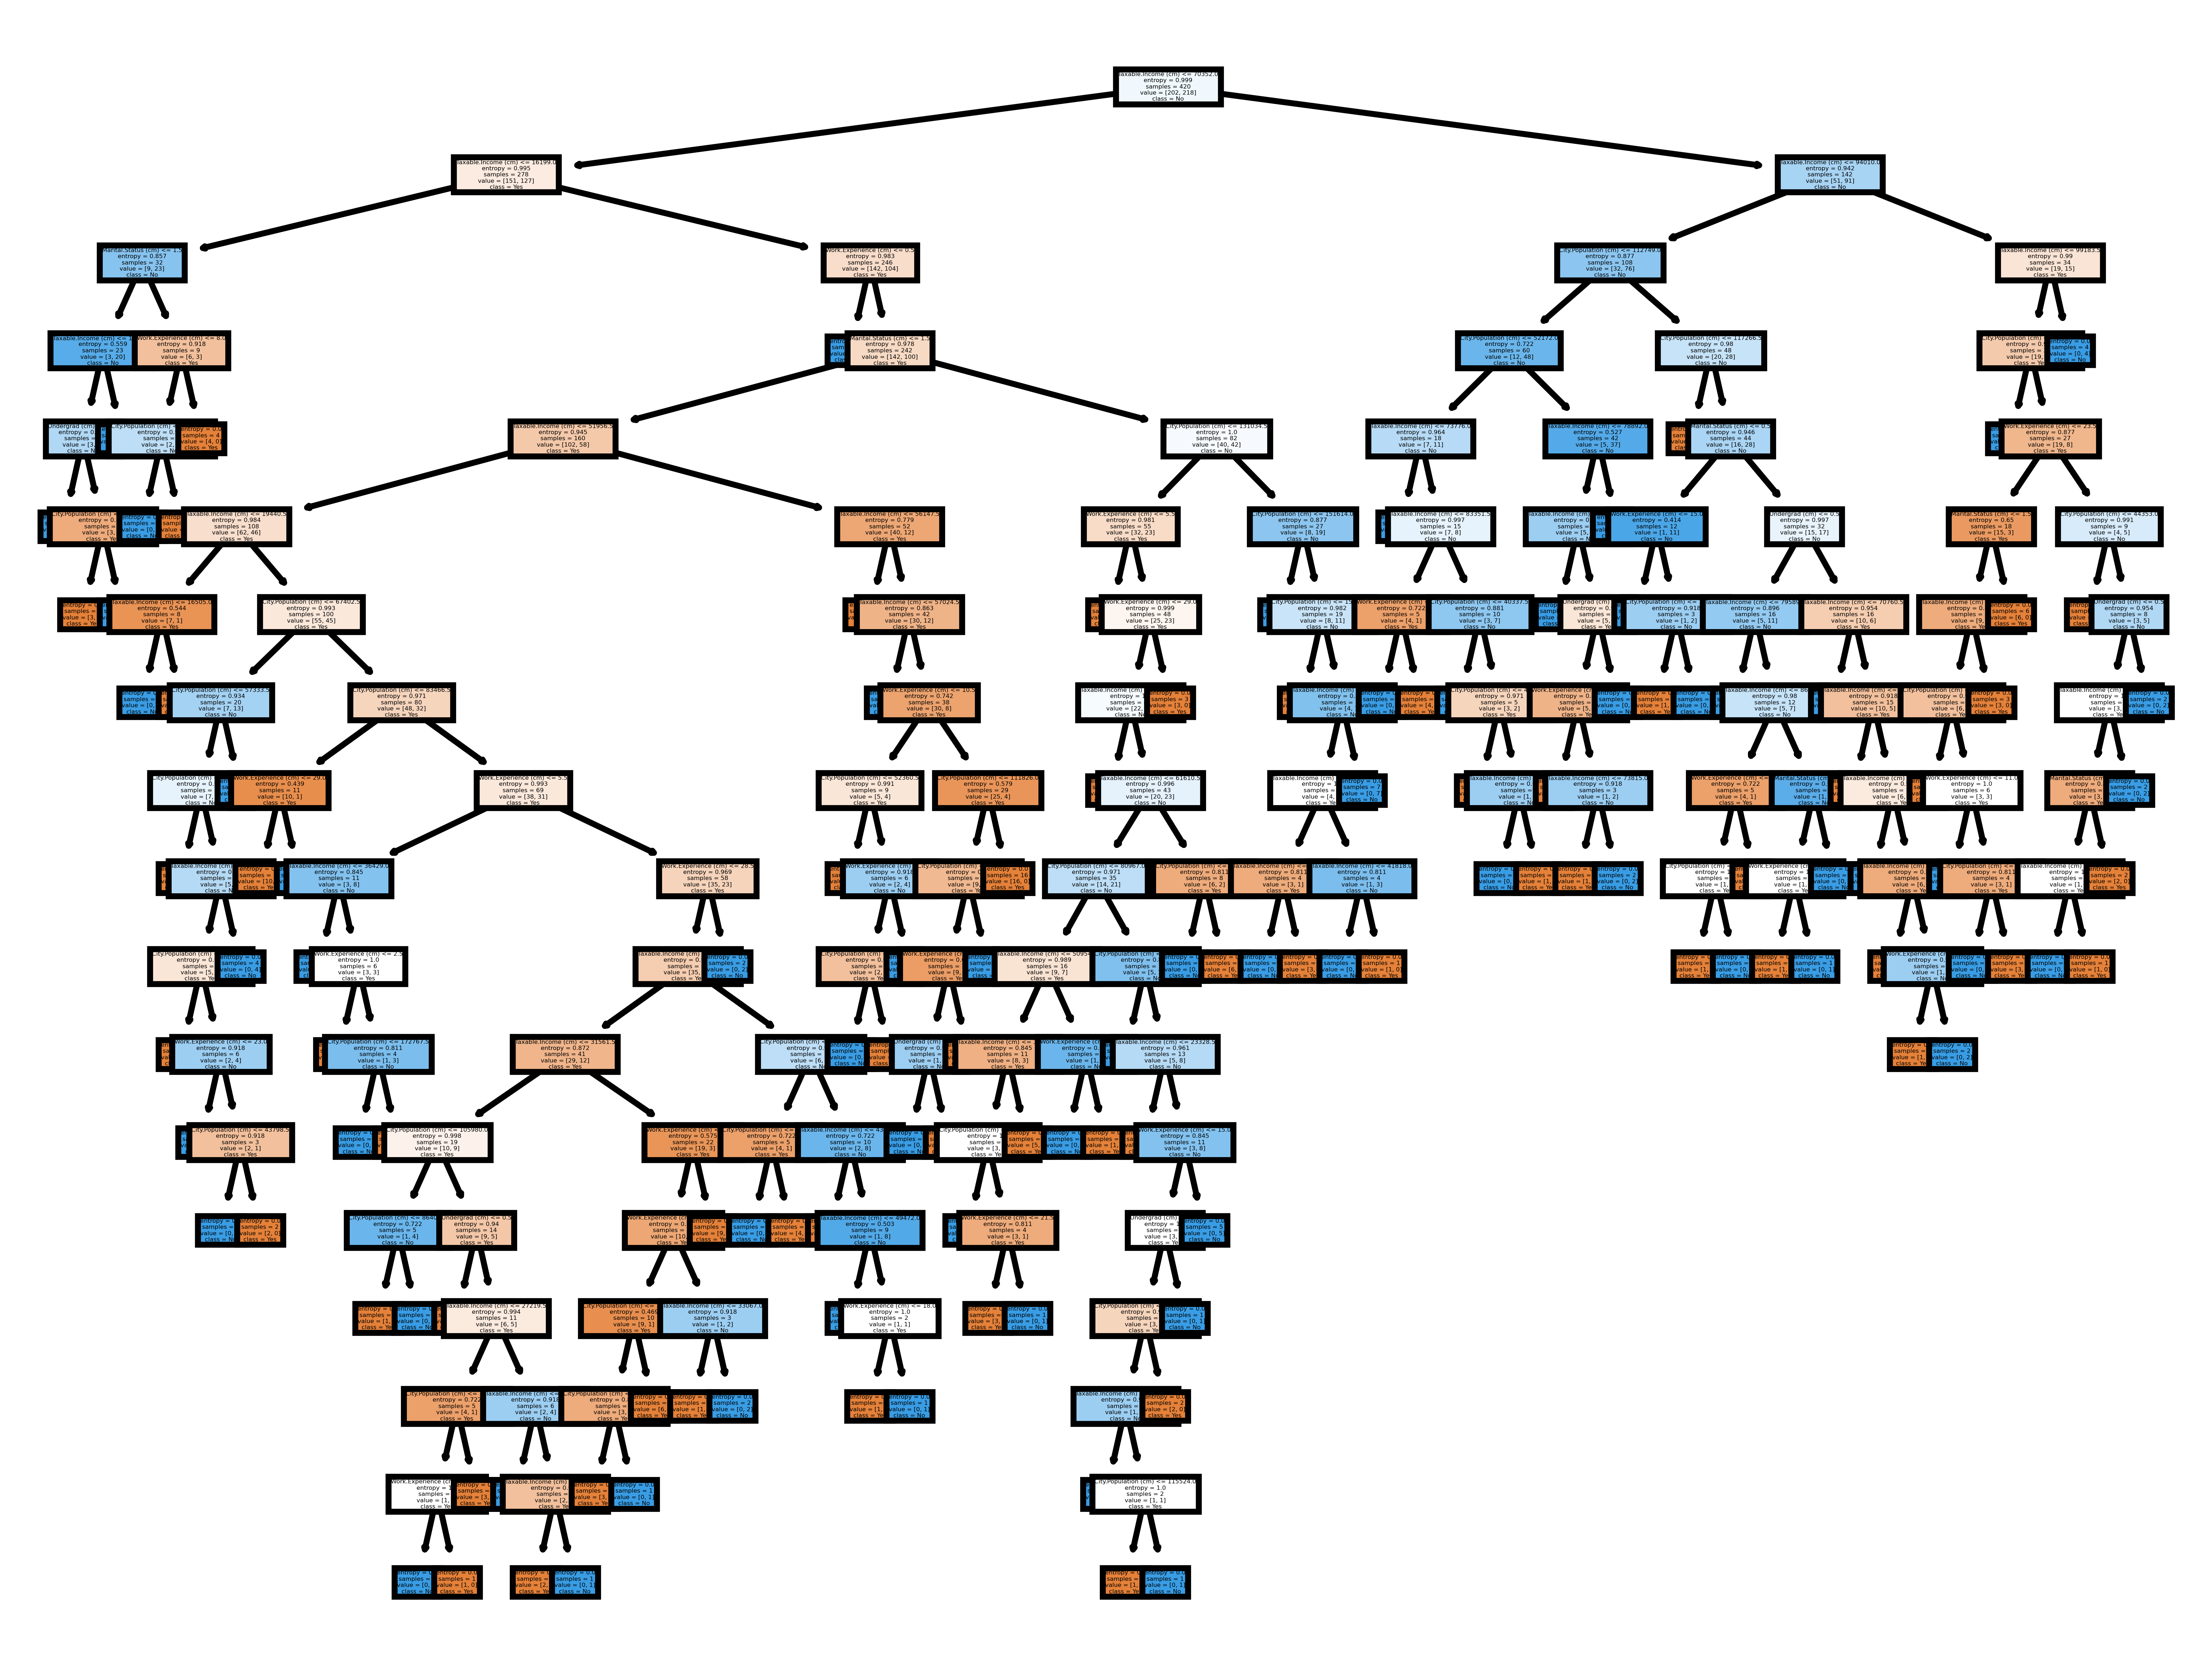

In [17]:
fn=['Undergrad (cm)','Marital.Status (cm)','Taxable.Income (cm)','City.Population (cm)','Work.Experience (cm)']         #x clmn names
cn=['Yes', 'No']                                                   #y clmn names
plt.figure(dpi=1200)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [18]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
# pd.Series(preds).value_counts() # getting the count of each category 
preds

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0], dtype=int64)

In [19]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':preds})
df_t

Actual  Predicted
0         1          0
1         0          1
2         1          1
3         0          1
4         1          1
..      ...        ...
175       1          0
176       0          1
177       1          1
178       1          0
179       1          0

[180 rows x 2 columns]

In [20]:
df = df_t[df_t["Actual"] != df_t["Predicted"]]
df

Actual  Predicted
0         1          0
1         0          1
3         0          1
6         0          1
8         0          1
..      ...        ...
174       1          0
175       1          0
176       0          1
178       1          0
179       1          0

[89 rows x 2 columns]

In [21]:
print(classification_report(y_test,preds))
#The overall Accuracy is 51% for 180 testset

              precision    recall  f1-score   support

           0       0.54      0.49      0.51        96
           1       0.47      0.52      0.50        84

    accuracy                           0.51       180
   macro avg       0.51      0.51      0.51       180
weighted avg       0.51      0.51      0.51       180



In [22]:
#Prediction on train data

pred_train = model.predict(x_train)
print(classification_report(y_train,pred_train))
#The overall Accuracy is 100% for 280 testset
#out of 92 vals of 0(No) all  predictions correct 
#Out of 188 vals of 1(Yes) all predictions correct 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       202
           1       1.00      1.00      1.00       218

    accuracy                           1.00       420
   macro avg       1.00      1.00      1.00       420
weighted avg       1.00      1.00      1.00       420



In [23]:
model.feature_importances_

array([0.04131873, 0.04765264, 0.38558447, 0.32490217, 0.200542  ])

# Conclusion

In [24]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi

feature  importance
2   Taxable.Income    0.385584
3  City.Population    0.324902
4  Work.Experience    0.200542
1   Marital.Status    0.047653
0        Undergrad    0.041319

In [25]:
# From the above tables it can be stated that TaxableIncome is most important feature 